In [29]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
weather = pd.read_excel('Downloads/Weather_data2.xlsx')
weather

,Day,City,Temperature,Wind speed
0,2019-01-01,Newyork,32,6
1,2019-01-02,Newyork,36,7
2,2019-01-03,Newyork,28,12
3,2019-01-04,Newyork,33,7
4,2019-01-01,Sydney,90,5
5,2019-01-02,Sydney,85,12
6,2019-01-03,Sydney,87,15
7,2019-01-04,Sydney,92,5
8,2019-01-01,Paris,45,20
9,2019-01-02,Paris,50,13


In [21]:
g = weather.groupby('City')
g

In [20]:
for city,city_df in g:
    print(city)
    print(city_df)

Newyork
         Day     City  Temperature  Wind speed
0 2019-01-01  Newyork           32           6
1 2019-01-02  Newyork           36           7
2 2019-01-03  Newyork           28          12
3 2019-01-04  Newyork           33           7
Paris
          Day   City  Temperature  Wind speed
8  2019-01-01  Paris           45          20
9  2019-01-02  Paris           50          13
10 2019-01-03  Paris           54           8
11 2019-01-04  Paris           42          10
Sydney
         Day    City  Temperature  Wind speed
4 2019-01-01  Sydney           90           5
5 2019-01-02  Sydney           85          12
6 2019-01-03  Sydney           87          15
7 2019-01-04  Sydney           92           5


In [22]:
g.get_group('Paris')

,Day,City,Temperature,Wind speed
8,2019-01-01,Paris,45,20
9,2019-01-02,Paris,50,13
10,2019-01-03,Paris,54,8
11,2019-01-04,Paris,42,10


In [23]:
g['Temperature'].max() #max temperature

City
Newyork    36
Paris      54
Sydney     92
Name: Temperature, dtype: int64

In [24]:
g.mean() #finding average wind speed

,Temperature,Wind speed
City,,
Newyork,32.25,8.00
Paris,47.75,12.75
Sydney,88.50,9.25


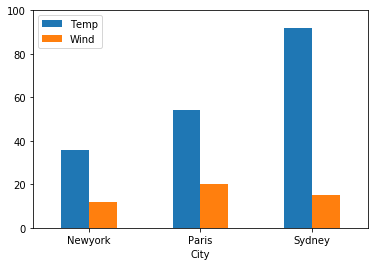

In [37]:
weather.groupby('City').agg(Temp=('Temperature', 'max'),
                       Wind=('Wind speed', 'max')).plot(kind='bar', ylim=(0, 100), rot=0);

Crosstabulation

In [38]:
import pandas as pd
from pandas import Series,DataFrame

In [41]:
train = pd.read_excel('Downloads/train.xlsx')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [57]:
pl = pd.crosstab(train.Age,train.Pclass)

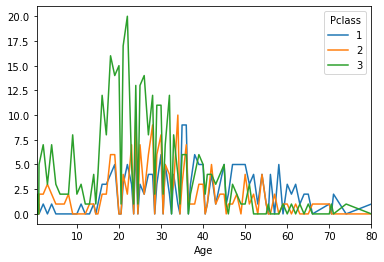

In [58]:
pl.plot()

Exercise: Connect to a dataset and use manipulation

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
tips = sb.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
day = pd.crosstab(tips.day,tips.size)
day

col_0,1708
day,
Thur,62
Fri,19
Sat,87
Sun,76


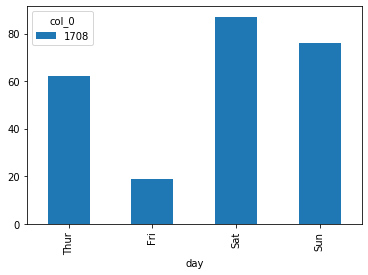

In [6]:
day.plot.bar()

In [11]:
tips_pivot = tips.pivot_table(index='day',aggfunc='sum')
tips_pivot

,size,tip,total_bill
day,,,
Thur,152,171.83,1096.33
Fri,40,51.96,325.88
Sat,219,260.40,1778.40
Sun,216,247.39,1627.16


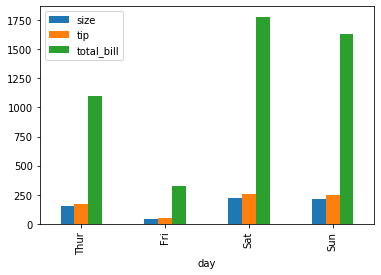

In [14]:
tips_pivot.plot.bar()

In [16]:
join = day.join(tips_pivot, how = "outer")
join

,1708,size,tip,total_bill
day,,,,
Thur,62,152,171.83,1096.33
Fri,19,40,51.96,325.88
Sat,87,219,260.40,1778.40
Sun,76,216,247.39,1627.16


In [19]:
join.columns = ['Total days','Total size','Total tips','Total bills']
join

,Total days,Total size,Total tips,Total bills
day,,,,
Thur,62,152,171.83,1096.33
Fri,19,40,51.96,325.88
Sat,87,219,260.40,1778.40
Sun,76,216,247.39,1627.16


Text(0.5, 1.0, 'Weekday Total')

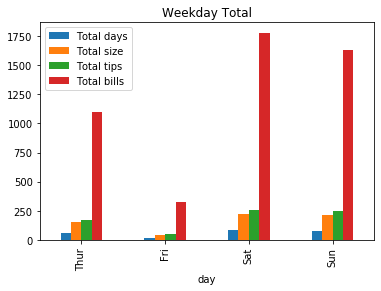

In [25]:
join.plot.bar()
plt.title('Weekday Total')

In [28]:
tips[['total_bill','tip']]

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


Text(0.5, 1.0, 'Total bill v Tips')

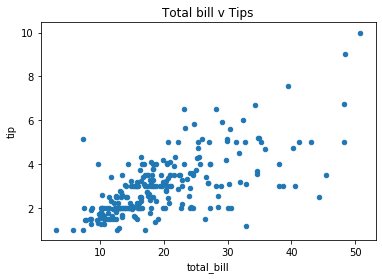

In [36]:
a = tips.plot.scatter('total_bill','tip')
plt.title('Total bill v Tips')

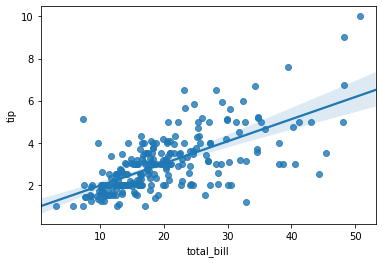

In [38]:
sb.regplot(x='total_bill', y='tip', data=tips)